In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

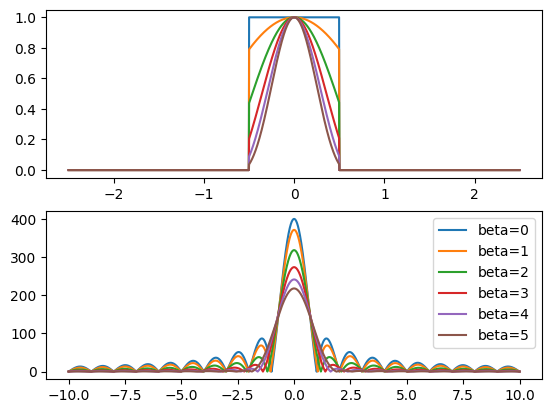

In [2]:
T = 1 
duaration = 1000
interval = 1/400
N = int(duaration/interval)
t_l = np.linspace(-duaration/2,duaration/2 - interval,N)
f_l = np.linspace(-0.5/interval,0.5/interval-1/interval/N,N)
x_0_f = np.zeros_like(f_l)
plt.figure()
for beta in range(0,6):
    x_t = np.zeros_like(t_l)
    x_t[int(-(T/2)/interval+N/2):int((T/2)/interval+N/2)] = ss.get_window(window=('kaiser',beta),Nx=int(T/interval))
    plt.subplot(2,1,1)
    plt.plot(t_l[int(N/2-1000):int(N/2+1000)],x_t[int(N/2-1000):int(N/2+1000)],label='beta='+str(beta))
    x_t_fft = np.fft.fft(x_t)
    x_t_fshift = np.fft.fftshift(x_t_fft)
    if (beta == 0):
        x_0_f = x_t_fshift
    plt.subplot(2,1,2)
    plt.plot(f_l[int(N/2-N/40):int(N/2+N/40)],np.abs(x_t_fshift[int(N/2-N/40):int(N/2+N/40)]),label='beta='+str(beta))
plt.legend()


Text(0, 0.5, 'PSLR/dB')

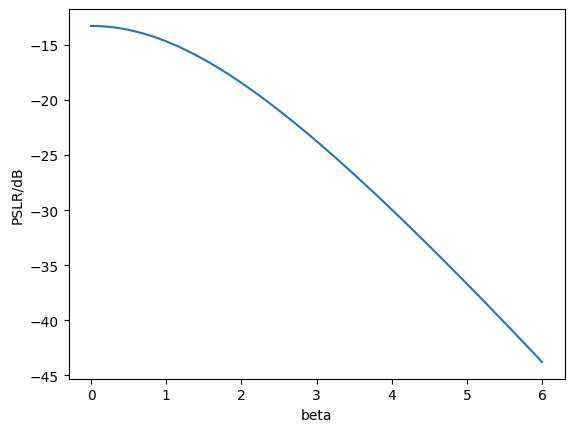

In [3]:
beta = np.linspace(0,6,60)
PSLR = np.zeros_like(beta)
i=0
for b in beta:
    x_t = np.zeros_like(t_l)
    x_t[int(-(T/2)/interval+N/2):int((T/2)/interval+N/2)] = ss.get_window(window=('kaiser',b),Nx=int(T/interval))
    x_t_fft = np.fft.fft(x_t)
    x_t_fshift = np.fft.fftshift(x_t_fft)
    x_fft_abs = np.abs(x_t_fshift)
    x_elex_index = ss.argrelextrema(x_fft_abs,np.greater)
    x_elex=np.sort(x_fft_abs[x_elex_index])
    PSLR[i] = (x_elex[-2]/x_elex[-1])**2
    i+=1

plt.figure()
plt.plot(beta,10*np.log10(PSLR))
plt.xlabel("beta")
plt.ylabel('PSLR/dB')

Text(0, 0.5, 'w_ratio')

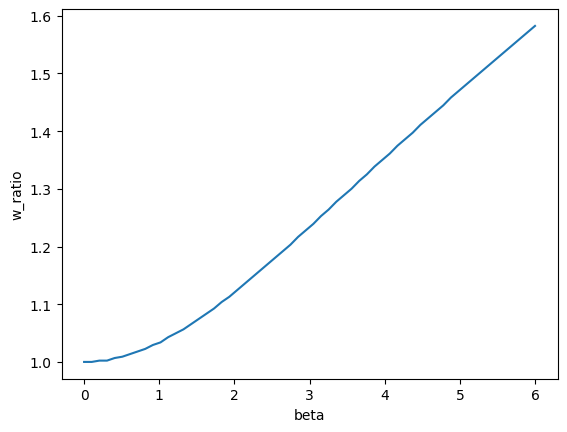

In [4]:
x_sinc_abs = np.abs(x_0_f)**2
x_sinc_abs /= np.abs(x_0_f[int(N/2)])**2
x_sinc_abs = x_sinc_abs[int(N/2-N/40):int(N/2+N/40)]
# plt.figure()
# plt.plot(f_l[int(N/2-N/40):int(N/2+N/40)],x_sinc_abs)
x_0_idx = np.abs(x_sinc_abs-0.5).argmin()
x_0_idx = np.array([x_0_idx,int(N/20-x_0_idx)])
w_0_ratio = (f_l[int(N/2-N/40):int(N/2+N/40)])[x_0_idx[1]] - (f_l[int(N/2-N/40):int(N/2+N/40)])[x_0_idx[0]]
# print(w_0_ratio,x_sinc_abs[x_0_idx[0]],x_sinc_abs[x_0_idx[1]])

w_ratio = np.zeros_like(beta)
i=0
for b in beta:
    x_t = np.zeros_like(t_l)
    x_t[int(-(T/2)/interval+N/2):int((T/2)/interval+N/2)] = ss.get_window(window=('kaiser',b),Nx=int(T/interval))
    x_t_fft = np.fft.fft(x_t)
    x_t_fshift = np.fft.fftshift(x_t_fft)
    x_fft_abs = np.abs(x_t_fshift)
    x_kaiser_abs = x_fft_abs[int(N/2-N/40):int(N/2+N/40)]**2
    x_kaiser_abs /= np.abs(x_fft_abs[int(N/2)])**2
    x_idx = np.abs(x_kaiser_abs-0.5).argmin()
    flag = (x_idx<int(N/20-x_idx))
    x_idx = np.array([x_idx*flag + int(N/20-x_idx)*(~flag),int(N/20-x_idx)*flag + x_idx*(~flag)])
    w_ratio[i] = (f_l[int(N/2-N/40):int(N/2+N/40)])[x_idx[1]] - (f_l[int(N/2-N/40):int(N/2+N/40)])[x_idx[0]]
    i+=1

plt.figure()
plt.plot(beta,w_ratio/w_0_ratio)
plt.xlabel("beta")
plt.ylabel("w_ratio")